# SOFR Strip Term Rates Example Notebook

This workbook will demonstrate using the datamine python package to retrieve CME SOFR Strip Term Rates.

This is a working example for reference and is a starting point for more advanced use cases.  This workbook will demonstrate the following workflow
1. Credentialling into Datamine.
2. Retrieving your data catalog of SOFR Strip Term Rates. 
3. Visualize the SOFR Strip Rates data.
3. Export the aggregate data into CSV file / Excel.


In [16]:
import datamine.io as dm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [17]:
#Establish an object to interact with CME Datamine.
#Supply Credentials per Documentation: http://www.cmegroup.com/market-data/datamine-api.html
myDatamine = dm.DatamineCon(username='API_SECDEV', password='Dec2019^', path='../data/')

## Get Your Catalog of SOFR Strip Rate Data

Datamine hosts all your subscriptions for download which you can see in the GUI.  https://datamine.cmegroup.com/

The following code will download a catalog of all your items.  We will turn that into a Pandas DataFrame to see what data we have in our account.


In [18]:
#Get your data catalog from Datamine
myDatamine.get_catalog(dataset='SOFRSR')

get_catalog: retrieving SOFRSR, limit None
get_catalog: 294 records downloaded, 147 duplicates, 147 saved


## Using the Data 

The following will show you example of how the Datamine python module can be used to copy down the data from the cloud to your local computer.  

This routine will download the data to the /data/* folder for each specific data set.  This routine copies everything down and overwrites anything locally.  This routine will take time depending upon the amount of data on the cloud that your trying to pull down.  The pulls are multithreaded to speed them up; you can adjust this by adjusting the processes in the MyDatamine object.

```myDatamine.processes = 4```

### Load Data into Long Data Frame

The following section will download the SOFR Strip Rate Locally and then present it in long format.  



In [19]:
# Load the SOFR term rates from datamine cloud and structure into dataframe of myDatamine.sofrsr_DF.  
# Will return 0 if successful
myDatamine.sofrstriprates_load(download=False)

reading SOFRSR data: 100%|██████████| 141/141 [00:02<00:00, 56.22it/s]
concatenating 141 dataframes


In [20]:
#look at the data frame
myDatamine.sofrstriprates_DF.head()

,rate,transactionTime,businessDate,productCode,securityId,Description
0,2.4457,05-24-2019:19:30:02,2019-05-24 00:00:00+00:00,TR1,401927,1-MTH SOFR SYNTH FUT
1,2.4260,05-24-2019:19:30:02,2019-05-24 00:00:00+00:00,TR3,663077,3-MTH SOFR SYNTH FUT
2,2.3748,05-24-2019:19:30:02,2019-05-24 00:00:00+00:00,TR6,623206,6-MTH SOFR SYNTH FUT
3,2.4456,05-31-2019:19:30:02,2019-05-31 00:00:00+00:00,TR1,401927,1-MTH SOFR SYNTH FUT
4,2.3955,05-31-2019:19:30:02,2019-05-31 00:00:00+00:00,TR3,663077,3-MTH SOFR SYNTH FUT


### Load Data into Wide Data Frame

The following section will download the SOFR Strip Rate Locally and then present it in wide format which may be easier for spreadsheet based usage.


In [21]:
myDatamine.sofrstriprates_load('wide',download=False)
myDatamine.sofrstriprates_DF.head()

reading SOFRSR data: 100%|██████████| 141/141 [00:02<00:00, 65.47it/s]
concatenating 141 dataframes


Description,1-MTH SOFR SYNTH FUT,3-MTH SOFR SYNTH FUT,6-MTH SOFR SYNTH FUT
businessDate,,,
2019-12-19,1.5958,1.5842,1.5645
2019-12-18,1.6012,1.5905,1.5712
2019-12-17,1.6029,1.5928,1.5723
2019-12-16,1.6036,1.5930,1.5745
2019-12-13,1.6076,1.5956,1.5718


### Charts

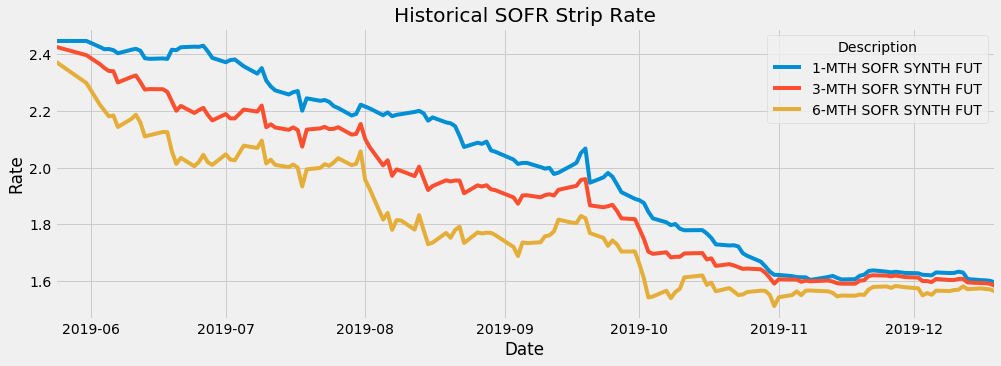

In [24]:
myDatamine.sofrstriprates_DF.plot(figsize=[15,5])
plt.title('Historical SOFR Strip Rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.style.use('fivethirtyeight')
plt.savefig('./images/SOFRStripRateHistorical.png')
plt.show()

## Export to Local CSV




In [23]:
myDatamine.sofrstriprates_DF.to_csv('CME_SOFR_Strip_Rates.csv')